In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:
train = pd.read_csv(r"C:\Proyectos\Titanic\train.csv")
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
def missing_table(df):
    miss = df.isnull().sum()
    pct  = 100 * miss / len(df)
    return pd.DataFrame({'missing': miss, 'pct': pct}).sort_values('pct', ascending=False)

display(missing_table(train))

,missing,pct
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [ ]:
print("\nConteo de sobrevivientes:")
print(train['Survived'].value_counts())


Conteo de sobrevivientes:
Survived
0    549
1    342
Name: count, dtype: int64


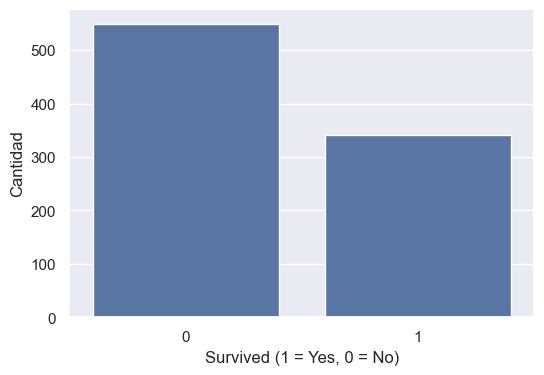

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train)
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Cantidad")
plt.show()

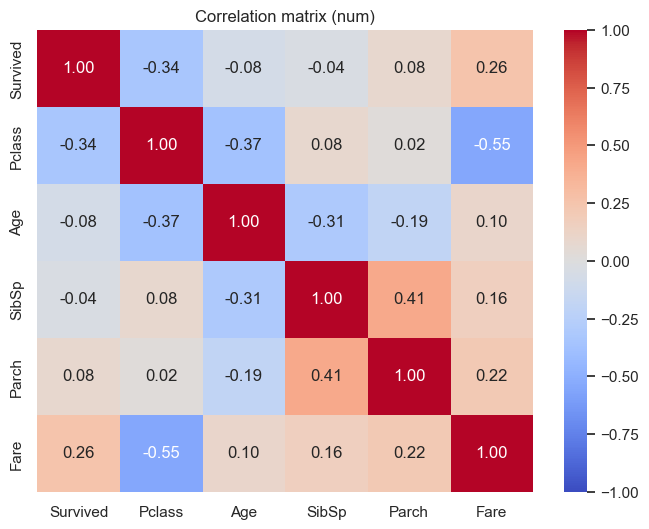

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [16]:
plt.figure(figsize=(8,6))
corr = train[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix (num)')
plt.show()
display(corr['Survived'].sort_values(ascending=False))

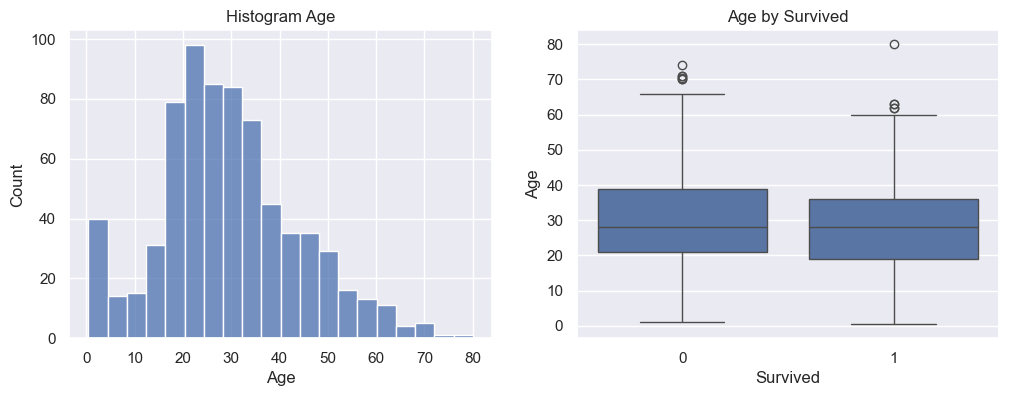

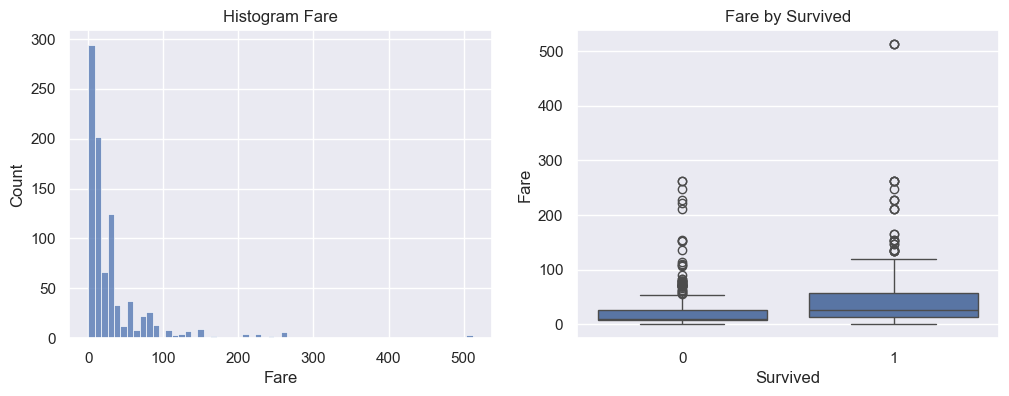

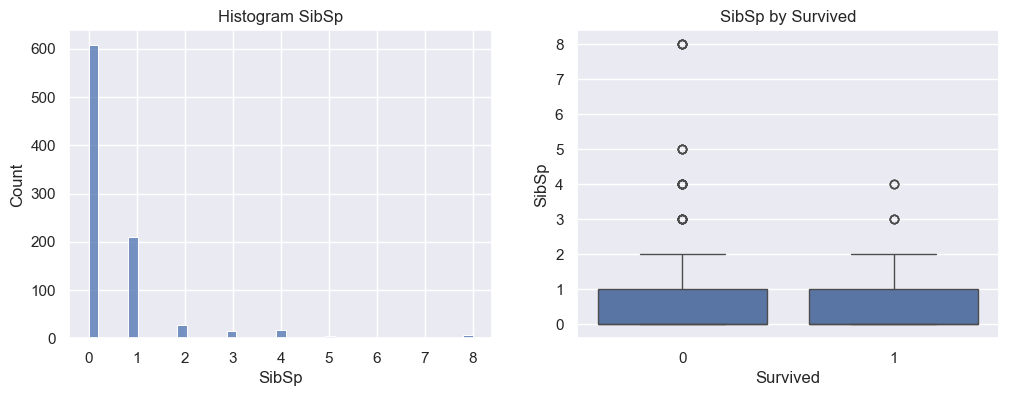

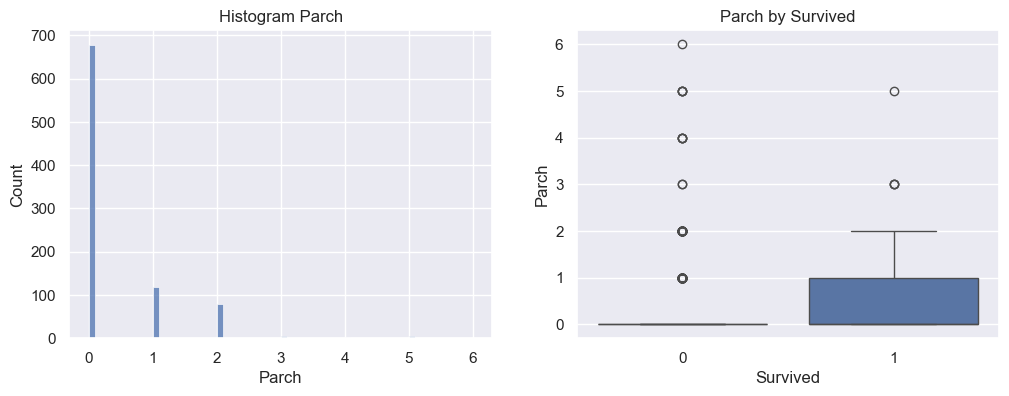

In [17]:
num_cols = ['Age','Fare','SibSp','Parch']
for c in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(train[c].dropna(), kde=False)
    plt.title(f'Histogram {c}')
    plt.subplot(1,2,2)
    sns.boxplot(x='Survived', y=c, data=train)
    plt.title(f'{c} by Survived')
    plt.show()